In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

from package import encoder

Loaded  1 encoders.


In [50]:
csv = pd.read_csv("Halpha.csv", encoding='latin-1', index_col=['ID', 'RA', 'DEC'])
#csv = encoder.encode_DataFrame(train)
df = pd.DataFrame()

In [3]:
csv.columns

Index(['Field', 'FWHM', 'ISOarea', 'KRON_RADIUS', 'MU_MAX', 'nDet_PStotal',
       'PhotoFlagDet', 'CLASS_STAR', 'u_PStotal', 'J0378_PStotal',
       'J0395_PStotal', 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal',
       'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 'i_PStotal',
       'J0861_PStotal', 'z_PStotal', 'e_u_PStotal', 'e_J0378_PStotal',
       'e_J0395_PStotal', 'e_J0410_PStotal', 'e_J0430_PStotal', 'e_g_PStotal',
       'e_J0515_PStotal', 'e_r_PStotal', 'e_J0660_PStotal', 'e_i_PStotal',
       'e_J0861_PStotal', 'e_z_PStotal'],
      dtype='object')

In [4]:
csv.shape

(2187, 32)

# Novo Data Frame

In [167]:
ndf = csv.loc[(csv['e_u_PStotal']<0.2) & 
                (csv['e_J0378_PStotal']<0.2) & 
                (csv['e_J0395_PStotal']<0.2) & 
                (csv['e_J0410_PStotal']<0.2) & 
                (csv['e_J0430_PStotal']<0.2) & 
                (csv['e_g_PStotal']<0.2) & 
                (csv['e_J0515_PStotal']<0.2) & 
                (csv['e_r_PStotal']<0.2) & 
                (csv['e_J0660_PStotal']<0.2) & 
                (csv['e_i_PStotal']<0.2) & 
                (csv['e_J0861_PStotal']<0.2) & 
                (csv['e_z_PStotal']<0.2),
                ['u_PStotal', 'J0378_PStotal', 'J0395_PStotal', 
                 'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [168]:
ndf.shape

(684, 12)

# DataFrame reduzido

In [169]:
rdf = csv.loc[(csv['e_J0410_PStotal']<0.2) & 
                (csv['e_J0430_PStotal']<0.2) & 
                (csv['e_g_PStotal']<0.2) & 
                (csv['e_J0515_PStotal']<0.2) & 
                (csv['e_r_PStotal']<0.2) & 
                (csv['e_J0660_PStotal']<0.2) & 
                (csv['e_i_PStotal']<0.2) & 
                (csv['e_J0861_PStotal']<0.2) & 
                (csv['e_z_PStotal']<0.2),
                ['J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 
                 'J0515_PStotal', 'r_PStotal', 'J0660_PStotal', 
                 'i_PStotal', 'J0861_PStotal', 'z_PStotal']]

In [170]:
rdf.shape

(900, 9)

# DataFrame mais reduzido ainda

In [165]:
df = csv.loc[(csv['e_J0430_PStotal']<0.2) & 
                (csv['e_g_PStotal']<0.2) & 
                (csv['e_J0515_PStotal']<0.2) & 
                (csv['e_r_PStotal']<0.2) & 
                (csv['e_J0660_PStotal']<0.2) & 
                (csv['e_i_PStotal']<0.2),
                ['J0430_PStotal', 'g_PStotal', 'J0515_PStotal', 
                 'r_PStotal', 'J0660_PStotal', 'i_PStotal']]


In [166]:
df.shape

(1063, 6)

# Definindo cores

In [43]:
filtros = ['J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 'J0515_PStotal', 'r_PStotal', 
           'J0660_PStotal', 'i_PStotal', 'J0861_PStotal', 'z_PStotal']

In [44]:
#cores = rdf['J0430_PStotal'] - rdf['g_PStotal']


,,,J0410_PStotal,J0430_PStotal,g_PStotal,J0515_PStotal,r_PStotal,J0660_PStotal,i_PStotal,J0861_PStotal,z_PStotal
ID,RA,DEC,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,16.527618,16.304626,15.712595,15.602545,14.579465,14.041800,14.135739,13.788973,13.767706
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,15.320404,15.284002,15.461737,15.157310,15.294937,14.924424,15.239864,15.167364,15.103933
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,15.409410,15.349426,15.492199,15.614660,15.360847,15.001359,15.375683,15.355514,15.372553
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,17.605415,16.900711,16.123627,16.050580,15.496835,14.925963,14.985117,14.378416,14.279529
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,15.568316,15.472755,15.513618,15.656550,15.418391,14.922369,15.678785,14.766943,15.023354
...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.STRIPE82-0119.074018',322.959256,0.006885,19.793745,19.501612,21.008545,19.997135,20.442848,18.689507,20.039750,18.531034,19.148790
b'iDR3.SPLUS-n12s25.025632 ',185.393364,-14.964030,20.368862,20.199562,20.351555,20.286472,20.422577,19.573475,19.903954,19.901840,19.191063
b'iDR3.HYDRA-0033.053054 ',154.116916,-26.517699,20.754410,20.943184,20.646580,20.508211,20.356123,19.188236,20.210710,20.123047,20.201614


0

In [172]:
conti = 0
contj = 0
for i in rdf.columns:
    contj = 0
    for j in rdf.columns:
        if i != j and contj > conti:
            cname = f"{i} - {j}"
            print(cname)
            cor = pd.DataFrame(rdf[i] - rdf[j], columns=[cname])
            if conti == 0 and contj == 1:
                cores = pd.DataFrame(rdf[i] - rdf[j], columns=[cname])
            else:
                cores = cores.join(cor)
        contj += 1
    conti += 1

J0410_PStotal - J0430_PStotal
J0410_PStotal - g_PStotal
J0410_PStotal - J0515_PStotal
J0410_PStotal - r_PStotal
J0410_PStotal - J0660_PStotal
J0410_PStotal - i_PStotal
J0410_PStotal - J0861_PStotal
J0410_PStotal - z_PStotal
J0430_PStotal - g_PStotal
J0430_PStotal - J0515_PStotal
J0430_PStotal - r_PStotal
J0430_PStotal - J0660_PStotal
J0430_PStotal - i_PStotal
J0430_PStotal - J0861_PStotal
J0430_PStotal - z_PStotal
g_PStotal - J0515_PStotal
g_PStotal - r_PStotal
g_PStotal - J0660_PStotal
g_PStotal - i_PStotal
g_PStotal - J0861_PStotal
g_PStotal - z_PStotal
J0515_PStotal - r_PStotal
J0515_PStotal - J0660_PStotal
J0515_PStotal - i_PStotal
J0515_PStotal - J0861_PStotal
J0515_PStotal - z_PStotal
r_PStotal - J0660_PStotal
r_PStotal - i_PStotal
r_PStotal - J0861_PStotal
r_PStotal - z_PStotal
J0660_PStotal - i_PStotal
J0660_PStotal - J0861_PStotal
J0660_PStotal - z_PStotal
i_PStotal - J0861_PStotal
i_PStotal - z_PStotal
J0861_PStotal - z_PStotal


In [173]:
cor

,,,J0861_PStotal - z_PStotal
ID,RA,DEC,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,0.021267
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,0.063431
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,-0.017039
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,0.098887
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,-0.256411
...,...,...,...
b'iDR3.STRIPE82-0119.074018',322.959256,0.006885,-0.617756
b'iDR3.SPLUS-n12s25.025632 ',185.393364,-14.964030,0.710777
b'iDR3.HYDRA-0033.053054 ',154.116916,-26.517699,-0.078567


In [175]:
cores

,,,J0410_PStotal - J0430_PStotal,J0410_PStotal - g_PStotal,J0410_PStotal - J0515_PStotal,J0410_PStotal - r_PStotal,J0410_PStotal - J0660_PStotal,J0410_PStotal - i_PStotal,J0410_PStotal - J0861_PStotal,J0410_PStotal - z_PStotal,J0430_PStotal - g_PStotal,J0430_PStotal - J0515_PStotal,...,r_PStotal - J0660_PStotal,r_PStotal - i_PStotal,r_PStotal - J0861_PStotal,r_PStotal - z_PStotal,J0660_PStotal - i_PStotal,J0660_PStotal - J0861_PStotal,J0660_PStotal - z_PStotal,i_PStotal - J0861_PStotal,i_PStotal - z_PStotal,J0861_PStotal - z_PStotal
ID,RA,DEC,,,,,,,,,,,,,,,,,,,,,
b'iDR3.SPLUS-n14s03.023094 ',152.818127,-17.691007,0.222992,0.815023,0.925073,1.948153,2.485818,2.391879,2.738645,2.759912,0.592031,0.702081,...,0.537665,0.443726,0.790492,0.811759,-0.093939,0.252827,0.274094,0.346766,0.368033,0.021267
b'iDR3.HYDRA-0077.084865 ',150.383353,-33.043261,0.036402,-0.141333,0.163094,0.025467,0.395980,0.080540,0.153040,0.216471,-0.177735,0.126691,...,0.370513,0.055073,0.127573,0.191004,-0.315440,-0.242940,-0.179509,0.072500,0.135931,0.063431
b'iDR3.SPLUS-s23s45.020422 ',352.251832,-29.779436,0.059984,-0.082789,-0.205250,0.048563,0.408051,0.033727,0.053896,0.036857,-0.142773,-0.265234,...,0.359488,-0.014836,0.005333,-0.011706,-0.374324,-0.354155,-0.371194,0.020169,0.003130,-0.017039
b'iDR3.SPLUS-n18s18.000089 ',174.850744,-23.627453,0.704704,1.481788,1.554835,2.108580,2.679452,2.620298,3.226999,3.325886,0.777084,0.850131,...,0.570872,0.511718,1.118419,1.217306,-0.059154,0.547547,0.646434,0.606701,0.705588,0.098887
b'iDR3.HYDRA-0049.043611 ',149.681164,-29.463707,0.095561,0.054698,-0.088234,0.149925,0.645947,-0.110469,0.801373,0.544962,-0.040863,-0.183795,...,0.496022,-0.260394,0.651448,0.395037,-0.756416,0.155426,-0.100985,0.911842,0.655431,-0.256411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'iDR3.STRIPE82-0119.074018',322.959256,0.006885,0.292133,-1.214800,-0.203390,-0.649103,1.104238,-0.246005,1.262711,0.644955,-1.506933,-0.495523,...,1.753341,0.403098,1.911814,1.294058,-1.350243,0.158473,-0.459283,1.508716,0.890960,-0.617756
b'iDR3.SPLUS-n12s25.025632 ',185.393364,-14.964030,0.169300,0.017307,0.082390,-0.053715,0.795387,0.464908,0.467022,1.177799,-0.151993,-0.086910,...,0.849102,0.518623,0.520737,1.231514,-0.330479,-0.328365,0.382412,0.002114,0.712891,0.710777
b'iDR3.HYDRA-0033.053054 ',154.116916,-26.517699,-0.188774,0.107830,0.246199,0.398287,1.566174,0.543700,0.631363,0.552796,0.296604,0.434973,...,1.167887,0.145413,0.233076,0.154509,-1.022474,-0.934811,-1.013378,0.087663,0.009096,-0.078567


# Teste1 PCA

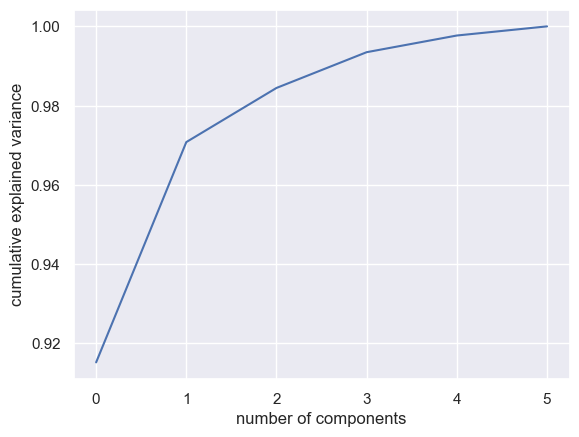

In [216]:
# Identificando quantos componentes serão necenssários
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Verificando, 2 componentes é o necessário para essa base!

In [233]:
pca = PCA(4)

In [234]:
df_pca = pca.fit_transform(df)

In [235]:
print(f"Data Frame Shape: {df.shape}")
print(f"PCA Frame Shape: {df_pca.shape}")

Data Frame Shape: (1063, 6)
PCA Frame Shape: (1063, 4)


In [236]:
df_pca

array([[ 9.39925172,  0.93180231, -0.17780947,  0.21211283],
       [ 8.92703714, -0.92675205,  0.07820022,  0.02115975],
       [ 8.5865645 , -0.89963901, -0.12978651,  0.24230089],
       ...,
       [-3.3652962 , -0.07474273,  0.18842763,  0.05827339],
       [-4.04258884,  0.55297886, -0.07088813,  0.38424303],
       [-2.14465758, -0.11891751,  2.14340774, -0.08725665]])

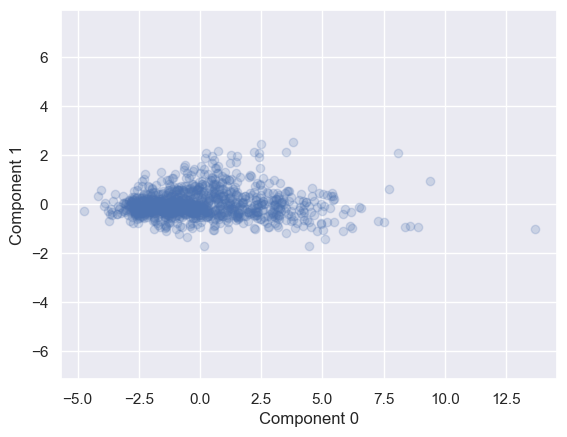

In [237]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

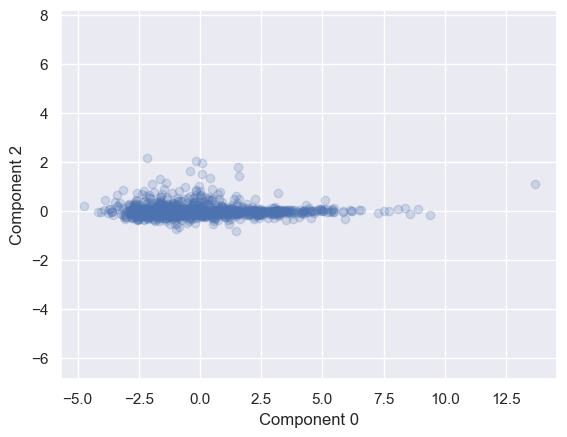

In [238]:
plt.scatter(df_pca[:, 0], df_pca[:, 2], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 2');
plt.axis('equal');

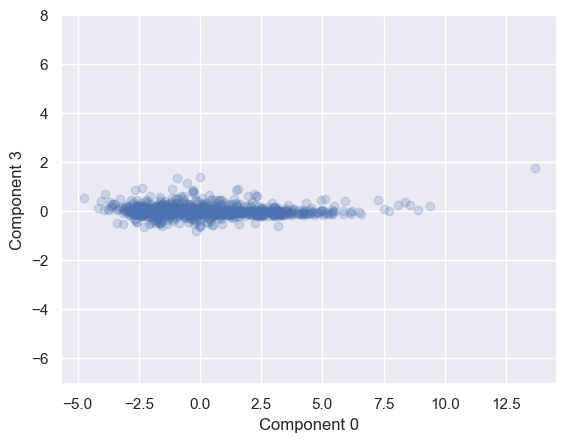

In [239]:
plt.scatter(df_pca[:, 0], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 3');
plt.axis('equal');

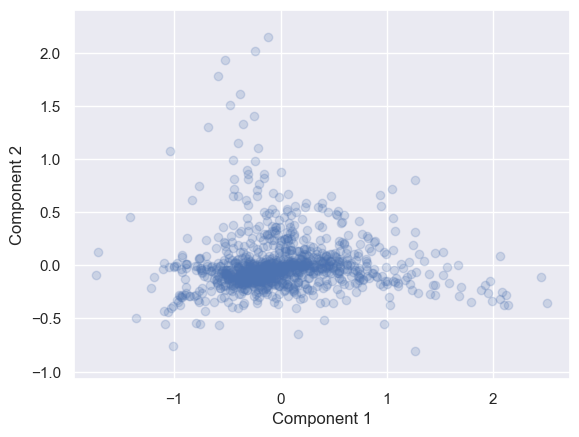

In [240]:
plt.scatter(df_pca[:, 1], df_pca[:, 2], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2');
plt.axis('equal');

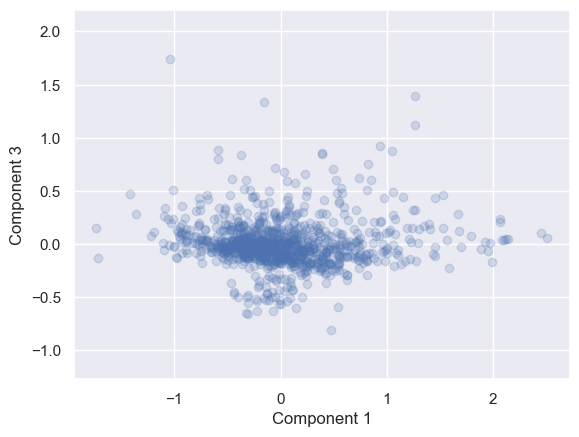

In [241]:
plt.scatter(df_pca[:, 1], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 3');
plt.axis('equal');

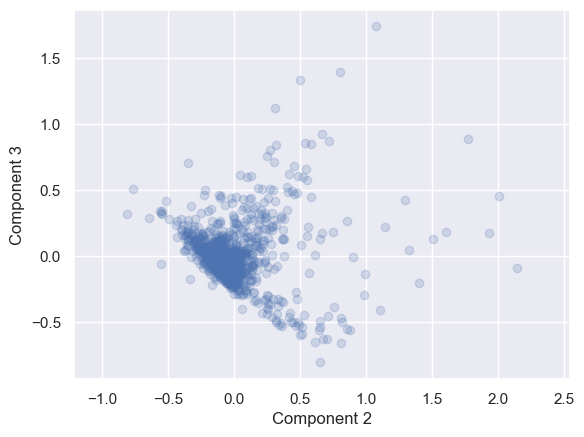

In [242]:
plt.scatter(df_pca[:, 2], df_pca[:, 3], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 3');
plt.axis('equal');

# Teste2 PCA - cores

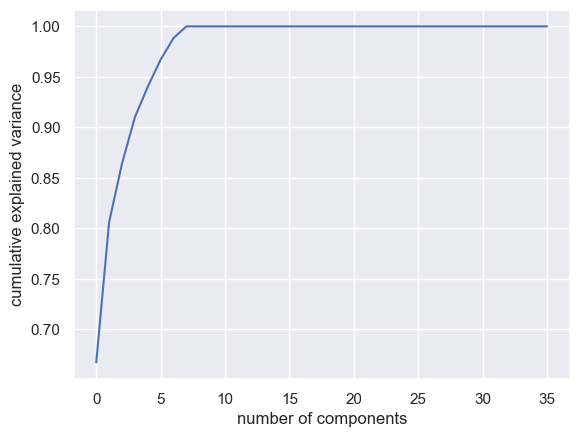

In [176]:
# Identificando quantos componentes serão necenssários
pca = PCA().fit(cores)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [188]:
pca = PCA(7)

In [189]:
cores_pca = pca.fit_transform(cores)

In [190]:
print(f"Data Frame Shape: {cores.shape}")
print(f"PCA Frame Shape: {cores_pca.shape}")

Data Frame Shape: (900, 36)
PCA Frame Shape: (900, 7)


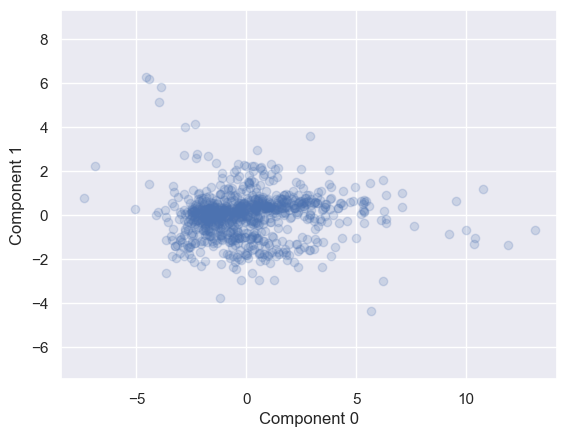

In [201]:
plt.scatter(cores_pca[:, 0], cores_pca[:, 1], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 1');
plt.axis('equal');

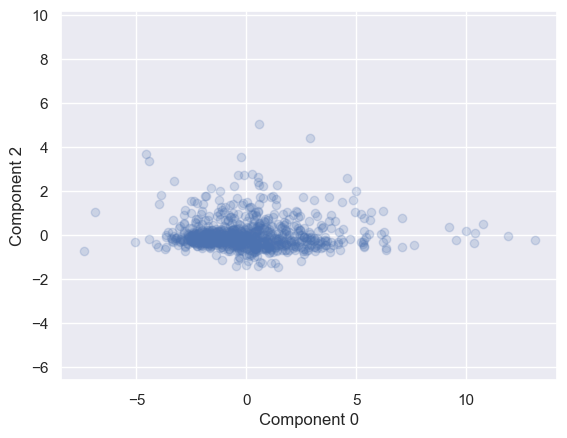

In [202]:
plt.scatter(cores_pca[:, 0], cores_pca[:, 2], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 2');
plt.axis('equal');

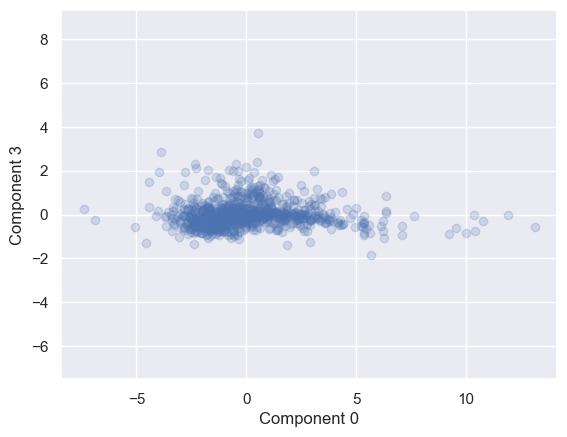

In [203]:
plt.scatter(cores_pca[:, 0], cores_pca[:, 3], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 3');
plt.axis('equal');

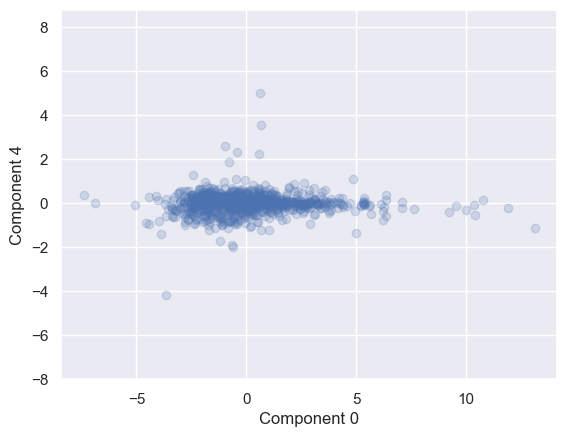

In [204]:
plt.scatter(cores_pca[:, 0], cores_pca[:, 4], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 4');
plt.axis('equal');

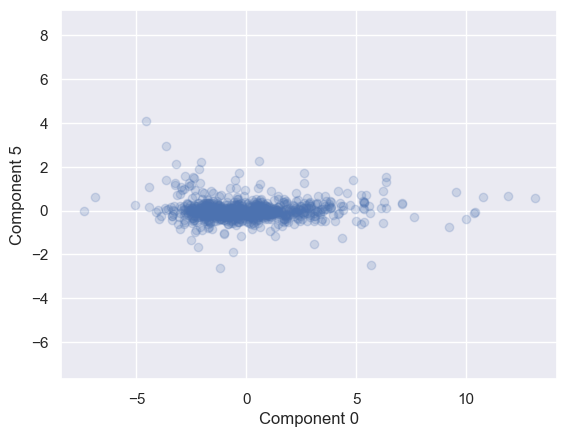

In [205]:
plt.scatter(cores_pca[:, 0], cores_pca[:, 5], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 5');
plt.axis('equal');

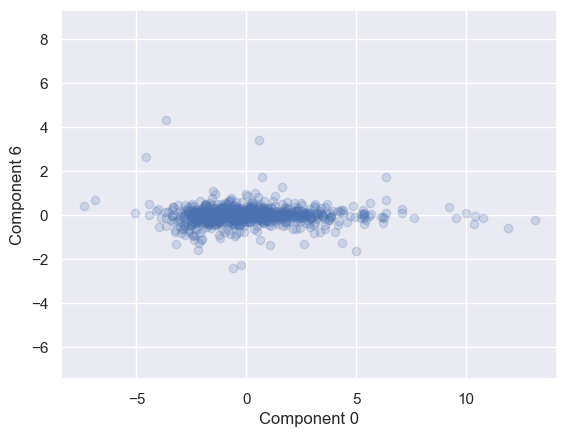

In [206]:
plt.scatter(cores_pca[:, 0], cores_pca[:, 6], alpha=0.2)
plt.xlabel('Component 0')
plt.ylabel('Component 6');
plt.axis('equal');

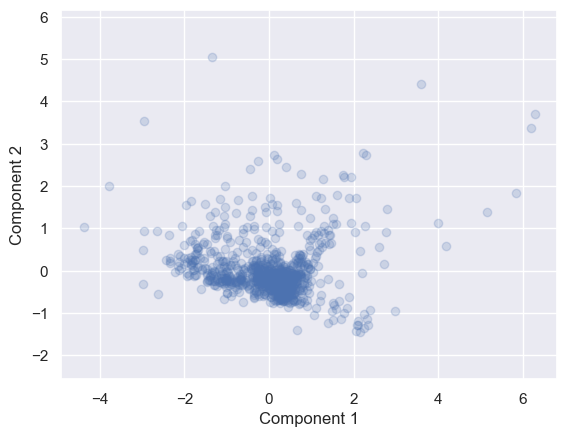

In [207]:
plt.scatter(cores_pca[:, 1], cores_pca[:, 2], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 2');
plt.axis('equal');

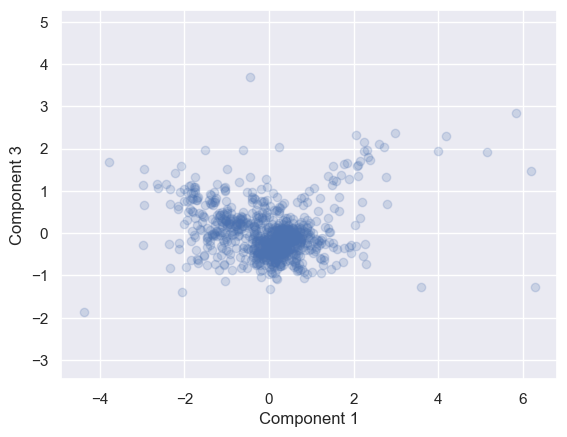

In [208]:
plt.scatter(cores_pca[:, 1], cores_pca[:, 3], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 3');
plt.axis('equal');

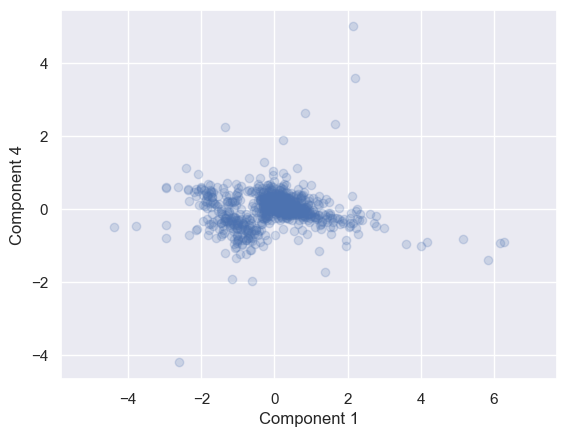

In [209]:
plt.scatter(cores_pca[:, 1], cores_pca[:, 4], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 4');
plt.axis('equal');

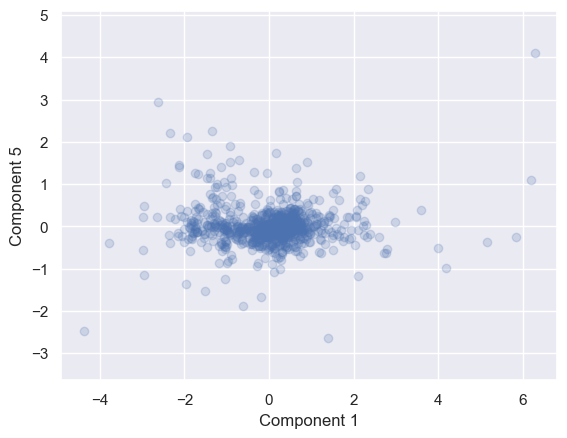

In [210]:
plt.scatter(cores_pca[:, 1], cores_pca[:, 5], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 5');
plt.axis('equal');

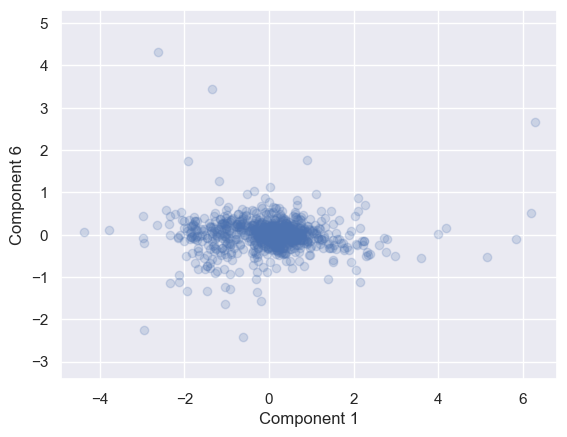

In [211]:
plt.scatter(cores_pca[:, 1], cores_pca[:, 6], alpha=0.2)
plt.xlabel('Component 1')
plt.ylabel('Component 6');
plt.axis('equal');

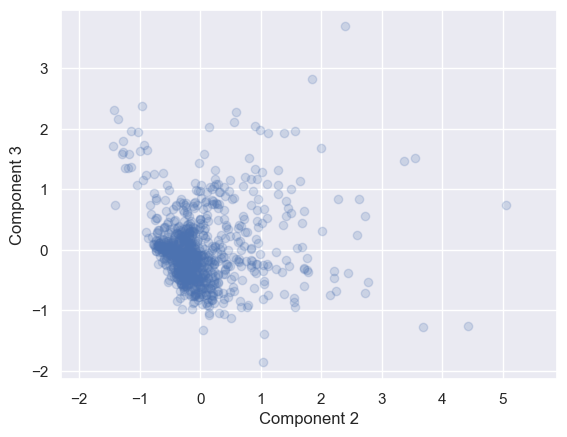

In [221]:
plt.scatter(cores_pca[:, 2], cores_pca[:, 3], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 3');
plt.axis('equal');

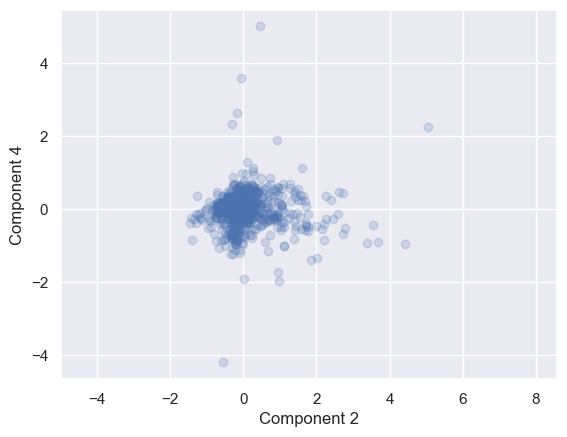

In [213]:
plt.scatter(cores_pca[:, 2], cores_pca[:, 4], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 4');
plt.axis('equal');

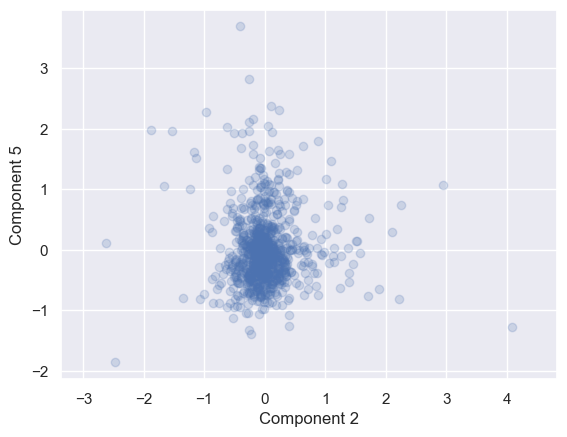

In [214]:
plt.scatter(cores_pca[:, 5], cores_pca[:, 3], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 5');
plt.axis('equal');

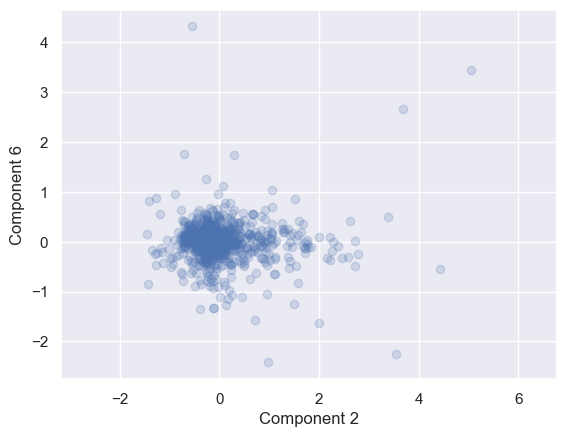

In [215]:
plt.scatter(cores_pca[:, 2], cores_pca[:, 6], alpha=0.2)
plt.xlabel('Component 2')
plt.ylabel('Component 6');
plt.axis('equal');

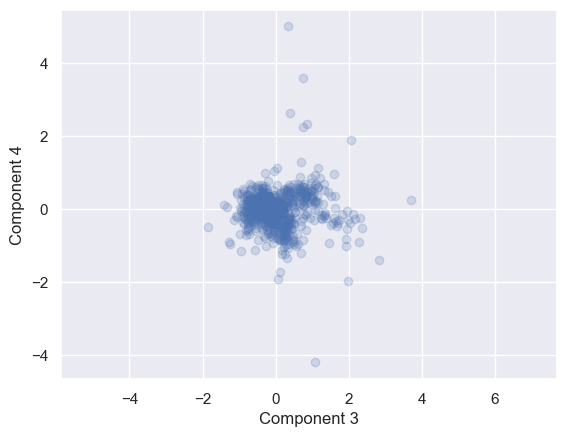

In [216]:
plt.scatter(cores_pca[:, 3], cores_pca[:, 4], alpha=0.2)
plt.xlabel('Component 3')
plt.ylabel('Component 4');
plt.axis('equal');

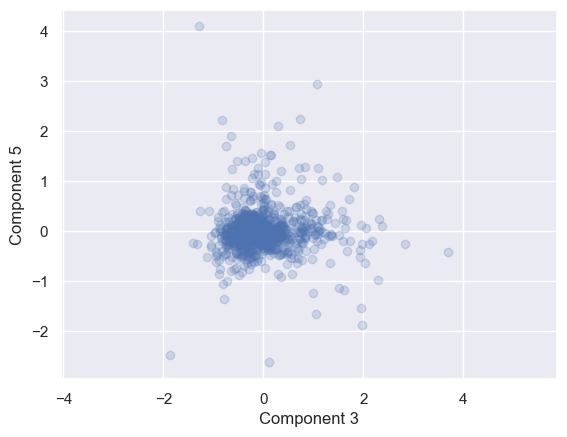

In [217]:
plt.scatter(cores_pca[:, 3], cores_pca[:, 5], alpha=0.2)
plt.xlabel('Component 3')
plt.ylabel('Component 5');
plt.axis('equal');

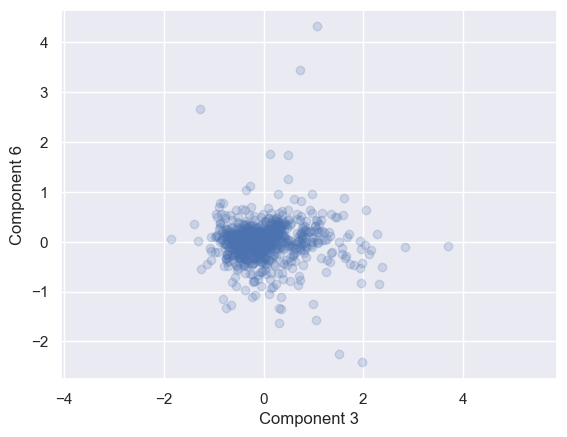

In [218]:
plt.scatter(cores_pca[:, 3], cores_pca[:, 6], alpha=0.2)
plt.xlabel('Component 3')
plt.ylabel('Component 6');
plt.axis('equal');

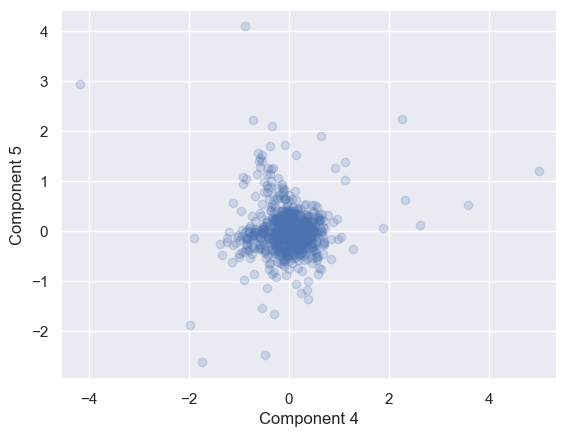

In [219]:
plt.scatter(cores_pca[:, 4], cores_pca[:, 5], alpha=0.2)
plt.xlabel('Component 4')
plt.ylabel('Component 5');
plt.axis('equal');

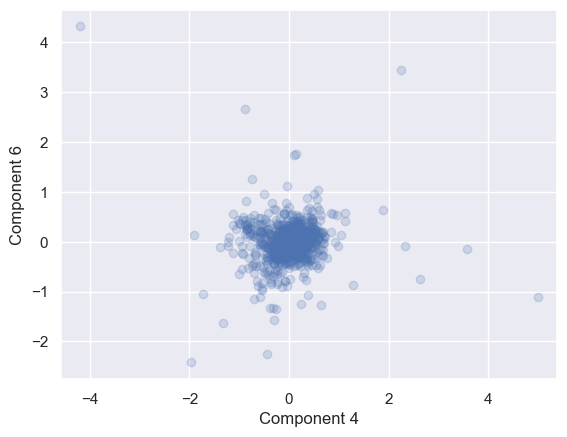

In [220]:
plt.scatter(cores_pca[:, 4], cores_pca[:, 6], alpha=0.2)
plt.xlabel('Component 4')
plt.ylabel('Component 6');
plt.axis('equal');

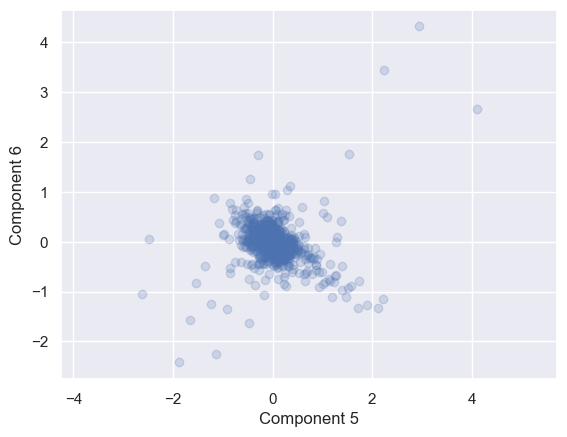

In [222]:
plt.scatter(cores_pca[:, 5], cores_pca[:, 6], alpha=0.2)
plt.xlabel('Component 5')
plt.ylabel('Component 6');
plt.axis('equal');